In [1]:
import math
import os
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
f = open('Москва_2021.txt', "r")
data = []
for line in f:
    line = line.strip()
    if line:  
        number = int(line) 
        data.append(number)
    


In [76]:
print(data)

[23, 32, 27, 26, 44, 49, 63, 34, 66, 66, 38, 27, 28, 35, 26, 46, 62, 44, 22, 35, 31, 31, 27, 37, 32, 49, 31, 22, 18, 29, 30, 20, 31, 18, 69, 36, 28, 38, 62, 25, 38, 32, 31, 18, 48, 38, 40, 21, 25, 27, 44, 45, 29, 41, 24, 19, 29, 67, 41, 44, 25, 22, 42, 40, 21, 44, 29, 34, 63, 32, 49, 34, 35, 23, 45, 26, 36, 46, 36, 45, 38, 31, 24, 29, 41, 31, 27, 41, 33, 20, 45, 25, 40, 41, 32, 20, 41, 41, 57, 47, 22, 63, 21, 43, 19, 30, 25, 41, 44, 27, 34, 33, 26, 47, 19, 43, 48, 30, 19, 33, 36, 29, 27, 36, 45, 34, 20, 48, 32, 20, 66, 23, 48, 26, 43, 26, 22, 41, 19, 55, 21, 43, 45, 34, 25, 49, 19, 35, 51, 18, 34, 24, 42, 19, 37, 21, 31, 34, 32, 47, 49, 23, 35, 24, 29, 48, 29, 36, 34, 39, 39, 25, 23, 52, 31, 33, 48, 35, 24, 25, 28, 30, 34, 34, 19, 29, 39, 33, 38, 25, 47, 19, 31, 19, 22, 27, 27, 24, 38, 31, 33, 27, 22, 25, 32, 28, 24, 48, 37, 18, 28, 23, 56, 38, 30, 38, 29, 36, 19, 40, 41, 25, 26, 36, 25, 51, 22, 23, 21, 27, 21, 32, 42, 49, 26, 29, 27, 18, 30, 38, 22, 25, 25, 48, 21, 38, 49, 60, 64, 29,

In [77]:
counter = Counter(data)
sorted_values = sorted(counter.keys())

In [ ]:
sorted_values

Статистичсекий ряд распределения

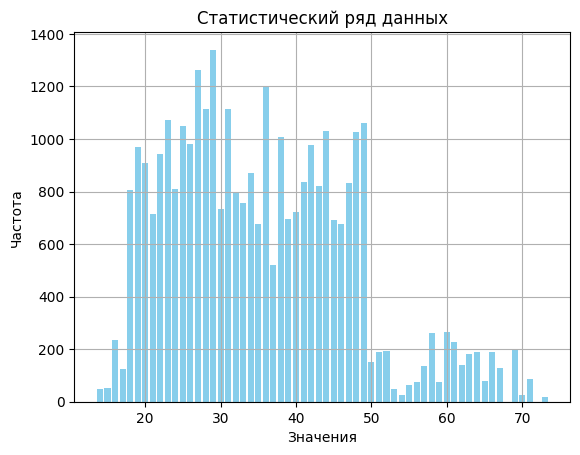

In [78]:
#Уник знач и частоты
values = list(counter.keys())
frequencies = list(counter.values())

plt.bar(values, frequencies, color='skyblue')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Статистический ряд данных')
plt.grid(True)

plt.show()

Полигон частот

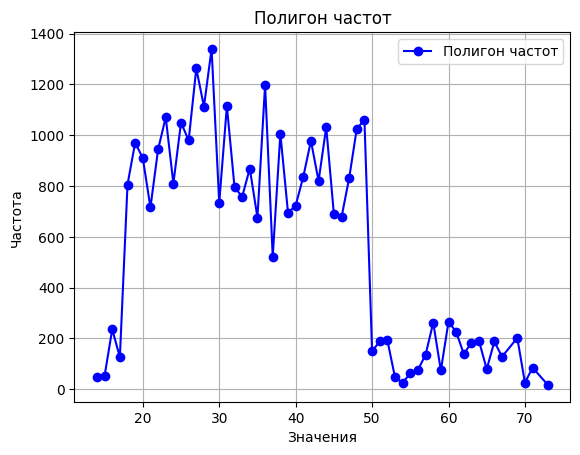

In [101]:
plt.plot(sorted_values, frequencies, marker='o', linestyle='-', color='blue', label='Полигон частот')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Полигон частот')
plt.grid(True)

plt.legend()
plt.show()

Среднее значение

In [1]:
def sum_mid(args):
    return sum(args)/len(args)

In [2]:
print(sum_mid(data))

NameError: name 'data' is not defined

Дисперсия

In [82]:
def despertion(args):
    x = sum_mid(args)
    lengh = len(args) 
    d = 0
    for arg in args:
        d += (arg - x)**2/lengh

    return d

In [83]:
print(despertion(data))

144.91696806480908


Среднее квадратичное отклонение

In [84]:
def mid_sqr_dec(args):
    return math.sqrt(despertion(args))

In [85]:
print(mid_sqr_dec(data))

12.038146371630853


Коэффициент вариации

In [86]:
def score_var(args):
    return mid_sqr_dec(args)/sum_mid(args) * 100

In [87]:
print(score_var(data))

34.03201326423575


Мода и ее частота 

In [88]:
def find_mode(args):
    counter = Counter(args)
    mode_data = counter.most_common(1)
    
    if mode_data:
        mode, frequency = mode_data[0]
        return mode, frequency
    else:
        return None, 0

In [89]:
print(find_mode(data))

(29, 1340)


Медиана

In [90]:
def mediana(args):
    args.sort()
    if len(args) % 2 == 0:
        return (args[(len(args) - 1)//2] + args[(len(args) - 1)//2 + 1]) // 2
    else:
        return args[(len(args) - 1)//2 + 1]

In [91]:
print(mediana(data))

34


Максимальеное и минимальное значение

In [92]:
print(max(data), min(data))

73 14


Размах 

In [93]:
print(max(data) - min(data))

59


Асимметрия

In [94]:
def access(args):
    x = sum_mid(args)
    msd = mid_sqr_dec(args)
    n = len(args)
    return sum(((i - x) / msd) ** 3 for i in args) / n

In [95]:
print(access(data))

0.6225379970646464


Эксцесс

In [96]:
def akccess(args):
    x = sum_mid(args)
    msd = mid_sqr_dec(args)
    n = len(args)
    return sum(((i - x) / msd) ** 4 for i in args) / n -3

In [97]:
print(akccess(data))

-0.06016734210592922


Правило трех сигм -> не подчинена нормальному распределению, по правилу трех сигм около это пределах половины одного процента 

In [98]:
def n_sigma(args, n):
    x = sum_mid(args)
    msd = mid_sqr_dec(args)
    low = x - n * msd
    up = x + n * msd
    count_within = sum(low <= x <= up for x in args)
    return (count_within / len(args)) * 100

In [99]:
print(n_sigma(data, 1))
print(n_sigma(data, 2))
print(n_sigma(data, 3))

66.35104709619715
94.6704499892052
99.94756808438454


Статиистическия функция с распределением (накопленные частоты)

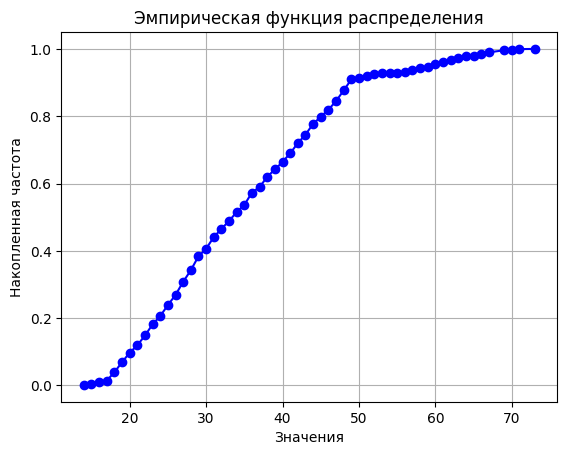

In [100]:
frequencies = [counter[val] for val in sorted_values]
cumulative_frequencies = []
cumulative_sum = 0
total_count = sum(frequencies)

for freq in frequencies:
    cumulative_sum += freq
    cumulative_frequencies.append(cumulative_sum / total_count)

plt.plot(sorted_values, cumulative_frequencies, marker='o', color='blue')
plt.xlabel('Значения')
plt.ylabel('Накопленная частота')
plt.title('Эмпирическая функция распределения')
plt.grid(True)

plt.show()